In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

#prevent notebook to hide columns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**There are missing values in waterfront, view, yr_renovated.**

In [4]:
#convert date
df['date'] = pd.to_datetime(df['date'])
df['date'].max(), df['date'].min()

(Timestamp('2015-05-27 00:00:00'), Timestamp('2014-05-02 00:00:00'))

Assumption: since the data is one year old, we ignore house appreciation in price.

In [5]:
#create year column
df['year_sold'] = pd.DatetimeIndex(df['date']).year

In [6]:
df.drop('date', axis=1, inplace=True)

# Deal with missing data and data type

Assumption: we assume that missing data in renovated year means the house has been renovated. we also assume that missing data in waterfront means that the house doesn't have  waterfront view

In [7]:
df['yr_renovated'].fillna(value=0.0, inplace=True)
df['waterfront'].fillna(value=0.0, inplace=True)

There are 63 houses missing 'view' values. 

One of them has a waterfront. So, we replace NaN of this one with 4.0 which is 

In [8]:
view_missing = df[df['view'].isna()].sort_values('price', ascending=False)

In [9]:
view_missing[view_missing['waterfront'] ==1]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
1313,7558700030,5300000.0,6,6.0,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.21,4320,24619,2015


The avg view rating of houses having waterfront is 4.  
The avg view rating of houses not having waterfront is 0.

In [10]:
round(df[df['waterfront']==1]['view'].mean())

4.0

In [11]:
round(df[df['waterfront']==0]['view'].mean())

0.0

We assign 4.0 to one that has waterfront, 0.0 for the others.

In [12]:
df.loc[df['id'] == 7558700030, 'view'] = 4.0

In [13]:
df['view'].fillna(value=0.0, inplace=True)

check out sqft_basement data type

In [14]:
df['sqft_basement'].value_counts().index

Index(['0.0', '?', '600.0', '500.0', '700.0', '800.0', '400.0', '1000.0',
       '300.0', '900.0',
       ...
       '475.0', '2580.0', '3480.0', '906.0', '2310.0', '2600.0', '266.0',
       '417.0', '2050.0', '3500.0'],
      dtype='object', length=304)

In [15]:
df['sqft_basement'].replace('?', '0.0',inplace=True)

In [16]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2600.0        1
266.0         1
417.0         1
2050.0        1
3500.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: int(x[:-2]))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Change price to integer (house price is too high to concern a penny level)

In [19]:
df.price = df.price.astype(np.int64)

# Create New Columns

We want to add 2 columns:  
house_age is the age of the house.
reno is a dummy variable--1 represents that the house has been renovated; 0 represents hasn't.  

In [20]:
df['house_age'] = df['year_sold'] - df['yr_built']

In [21]:
df['reno'] = np.where(df['yr_renovated'] != 0, 1, 0)

In [22]:
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [23]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0


# Potential Outliers 

We will drop some outliers in our data

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'cente

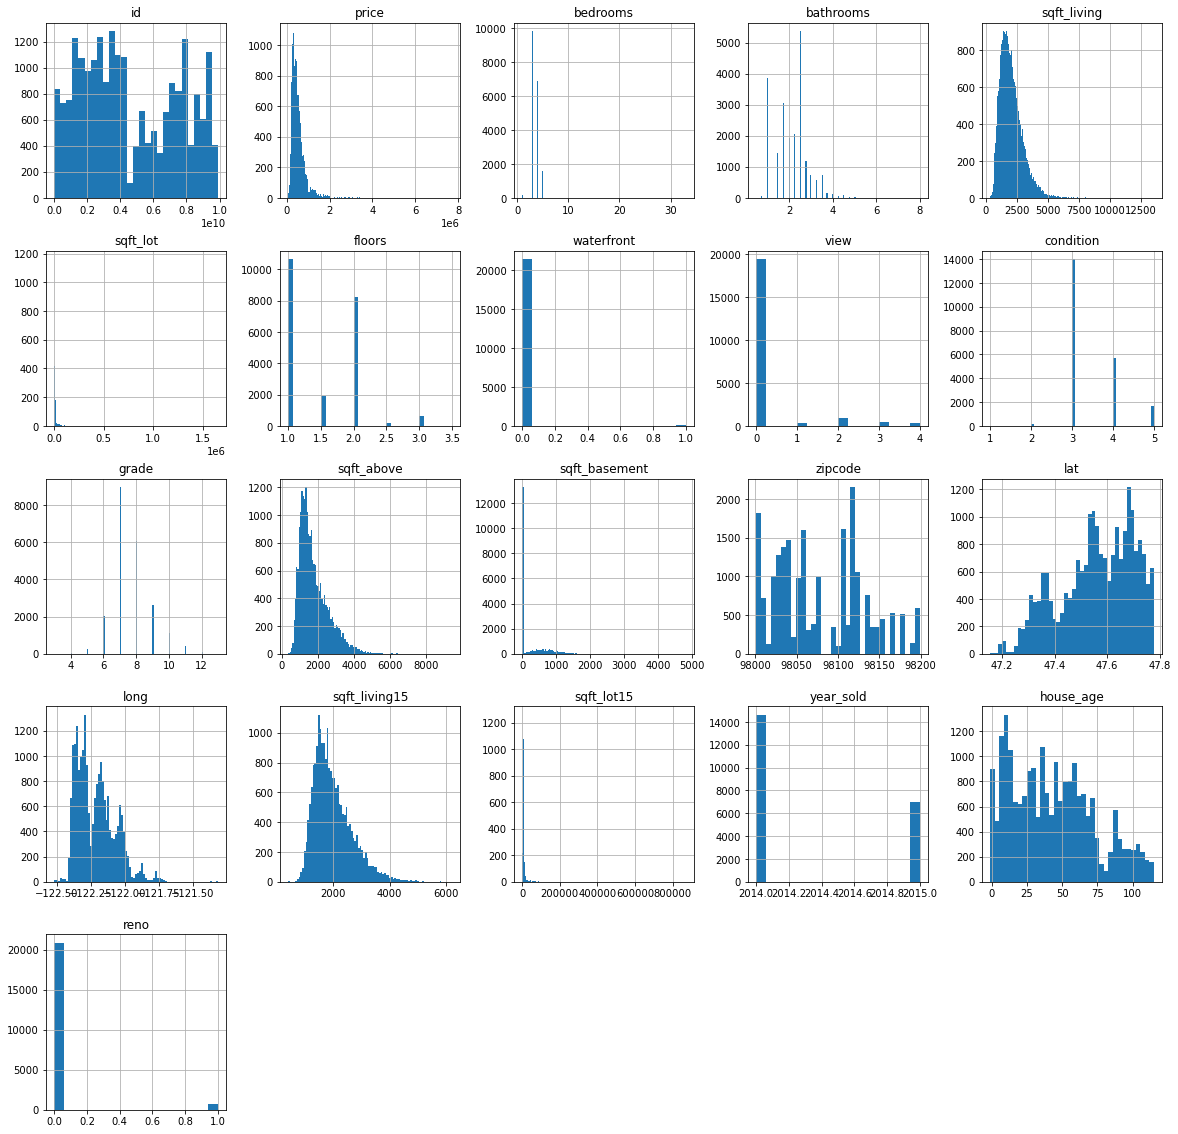

In [24]:
df.hist(figsize=(20,20), bins='auto')

**Price**

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'House Price')

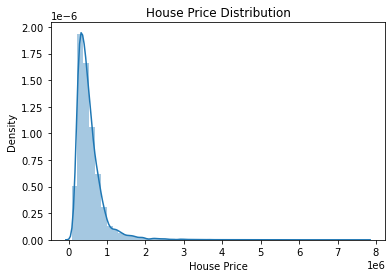

In [25]:
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.distplot(df['price'])

ax.set_title("House Price Distribution")
ax.set_xlabel('House Price')

There are some super long tail after 4m in price. We drop houses that are 4 and above.

In [26]:
print(len(df[df.price>4000000]))
df[df.price>4000000]


11


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
1162,1247600105,5110000,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020,98033,47.6767,-122.211,3430,26788,2014,15,0
1313,7558700030,5300000,6,6.00,7390,24829,2.0,1.0,4.0,4,12,5000,2390,98040,47.5631,-122.210,4320,24619,2015,24,0
1446,8907500070,5350000,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280,98004,47.6232,-122.220,4600,21750,2015,6,0
2624,7738500731,4500000,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290,98155,47.7493,-122.280,3030,23408,2014,10,0
3910,9808700762,7060000,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360,98004,47.6500,-122.214,3930,25449,2014,74,1
4407,2470100110,5570000,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000,98039,47.6289,-122.233,3560,24345,2014,13,0
7245,6762700020,7700000,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480,98102,47.6298,-122.323,3940,8800,2014,104,1
8085,1924059029,4670000,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820,98040,47.5570,-122.210,3270,10454,2014,31,1
8629,3835500195,4490000,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,0,98004,47.6208,-122.219,3720,14592,2014,13,0
9245,9208900037,6890000,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030,98039,47.6305,-122.240,4540,42730,2014,13,0


In [27]:
df = df[df.price <= 4000000]

In [28]:
df.shape

(21586, 21)

**Bedrooms**

In [29]:
df.bedrooms.value_counts()

3     9824
4     6881
2     2760
5     1594
6      269
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We drop ones that are higher than 10.

In [30]:
df[df.bedrooms >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
8748,1773100755,520000,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600,98106,47.5560,-122.363,1420,4960,2014,96,1
13301,627300145,1150000,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090,98004,47.5861,-122.113,2730,10400,2014,6,0
15147,5566100170,650000,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600,98006,47.5705,-122.175,2040,11914,2014,56,0
15856,2402100895,640000,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580,98103,47.6878,-122.331,1330,4700,2014,67,0
19239,8812401450,660000,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060,98105,47.6635,-122.320,1810,3745,2014,101,0


In [31]:
df = df[df.bedrooms < 10]

In [32]:
df.shape

(21581, 21)

**Bathrooms**

In [33]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
5.50       9
1.25       9
6.00       4
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64

In [34]:
df[df.bathrooms > 6]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
4020,9175600025,800000,7,6.75,7480,41664,2.0,0.0,2.0,3,11,5080,2400,98166,47.4643,-122.368,2810,33190,2014,61,0
8537,424049043,450000,9,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0,98144,47.5923,-122.301,1448,3866,2014,18,0
12764,1225069038,2280000,7,8.00,13540,307752,3.0,0.0,4.0,3,12,9410,4130,98053,47.6675,-121.986,4850,217800,2014,15,0
14542,2303900035,2890000,5,6.25,8670,64033,2.0,0.0,4.0,3,13,6120,2550,98177,47.7295,-122.372,4140,81021,2014,49,0
18288,6072800246,3300000,5,6.25,8020,21738,2.0,0.0,0.0,3,11,8020,0,98006,47.5675,-122.189,4160,18969,2014,13,0
20562,424069279,1180000,6,6.50,6260,10955,2.0,0.0,0.0,3,11,4840,1420,98075,47.5947,-122.039,2710,12550,2015,8,0
21490,2524069097,2240000,5,6.50,7270,130017,2.0,0.0,0.0,3,12,6420,850,98027,47.5371,-121.982,1800,44890,2014,4,0


We drop ones that are higher than 6.

In [35]:
df = df[df.bathrooms <= 6]

In [36]:
df.shape

(21574, 21)

**Sqft Living** 

Many of sqft living outliers have been removed with price outliers.

In [37]:
df[df.sqft_living > 10000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno


**Sqft Lot** 

In [38]:
df.sqft_lot.value_counts()

5000      358
6000      289
4000      251
7200      220
4800      119
         ... 
11148       1
27540       1
35736       1
1448        1
315374      1
Name: sqft_lot, Length: 9761, dtype: int64

In [39]:
df[df.sqft_lot > 700000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
1717,1020069017,700000,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0,98022,47.2313,-122.023,2560,425581,2015,95,0
3945,722069232,998000,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0,98058,47.4140,-122.087,2290,37141,2014,22,0
4437,3626079040,790000,2,3.00,2560,982278,1.0,0.0,0.0,3,8,2560,0,98014,47.6955,-121.861,1620,40946,2014,10,0
4536,2522029039,550000,3,2.00,3650,843309,2.0,0.0,0.0,4,7,3650,0,98070,47.3627,-122.496,1870,273992,2014,23,0
6685,2624089007,2000000,2,2.50,3900,920423,2.0,0.0,0.0,3,12,3900,0,98065,47.5371,-121.756,2720,411962,2015,6,0
7070,2724079090,1650000,4,3.25,3920,881654,3.0,0.0,3.0,3,11,3920,0,98024,47.5385,-121.896,2970,112384,2015,13,0
7640,2623069031,542500,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000,98027,47.4564,-122.004,2450,68825,2014,83,0
7762,2323089009,855000,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0,98045,47.4619,-121.744,1830,11700,2015,9,0
9705,225079036,937500,4,4.00,5545,871200,2.0,0.0,0.0,3,11,3605,1940,98014,47.6760,-121.882,3420,871200,2015,12,0
12993,619079096,750000,3,2.50,2350,715690,1.5,0.0,0.0,4,9,2350,0,98022,47.1622,-121.971,1280,325393,2015,36,0


In [40]:
df = df[df.sqft_lot <= 700000]

**Sqft above** 

In [41]:
df[df.sqft_above > 6500]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
11093,4054530260,1820000,4,4.50,6640,53330,2.0,0.0,0.0,3,12,6640,0,98077,47.7283,-122.046,4620,68625,2014,21,0
11859,8835800350,1950000,4,3.25,7420,167869,2.0,0.0,3.0,3,12,7420,0,98045,47.4548,-121.764,5610,169549,2015,13,0
13398,2426039123,2420000,5,4.75,7880,24250,2.0,0.0,2.0,3,13,7880,0,98177,47.7334,-122.362,2740,10761,2015,19,0
16759,1630700380,1920000,5,5.75,7730,230868,2.0,0.0,0.0,3,12,6660,1070,98077,47.7615,-122.084,2660,39292,2015,11,0
18579,3023069166,1140000,5,4.00,7320,217800,2.0,0.0,0.0,3,11,7320,0,98058,47.4473,-122.086,3270,34500,2014,22,0
19842,2524069078,2700000,4,4.00,7850,89651,2.0,0.0,0.0,3,12,7850,0,98027,47.5406,-121.982,6210,95832,2015,9,0


In [42]:
df = df[df.sqft_above <= 6500]

**Sqft basement** 

In [43]:
df[df.sqft_basement > 3000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
10074,7767000060,1900000,5,4.25,6510,16471,2.0,0.0,3.0,4,11,3250,3260,98040,47.5758,-122.242,4480,16471,2014,34,0
15468,624069108,3200000,4,3.25,7000,28206,1.0,1.0,4.0,4,12,3500,3500,98075,47.5928,-122.086,4913,14663,2014,23,0


In [44]:
df = df[df.sqft_basement <= 3000]

**Sqft lot15** 

In [45]:
df[df.sqft_lot15 > 400000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
3797,1550000463,637000,4,3.50,3080,118918,2.0,0.0,0.0,3,9,3080,0,98019,47.7721,-121.924,1830,434728,2014,6,0
8655,3226079059,549950,3,1.75,2930,266587,2.0,0.0,0.0,3,8,2440,0,98014,47.6991,-121.947,2700,438213,2014,19,0
13451,3420069060,790000,3,2.50,2640,432036,1.5,0.0,3.0,3,10,2640,0,98022,47.1795,-122.036,1500,560617,2014,18,0
19141,1020069042,858000,4,3.50,4370,422967,1.0,0.0,2.0,4,10,2580,1790,98022,47.2332,-122.029,3260,422967,2014,36,0


In [46]:
df = df[df.sqft_lot15 <= 400000]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21550 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21550 non-null  int64  
 1   price          21550 non-null  int64  
 2   bedrooms       21550 non-null  int64  
 3   bathrooms      21550 non-null  float64
 4   sqft_living    21550 non-null  int64  
 5   sqft_lot       21550 non-null  int64  
 6   floors         21550 non-null  float64
 7   waterfront     21550 non-null  float64
 8   view           21550 non-null  float64
 9   condition      21550 non-null  int64  
 10  grade          21550 non-null  int64  
 11  sqft_above     21550 non-null  int64  
 12  sqft_basement  21550 non-null  int64  
 13  zipcode        21550 non-null  int64  
 14  lat            21550 non-null  float64
 15  long           21550 non-null  float64
 16  sqft_living15  21550 non-null  int64  
 17  sqft_lot15     21550 non-null  int64  
 18  year_s

**See result from dropping outliers**

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'cente

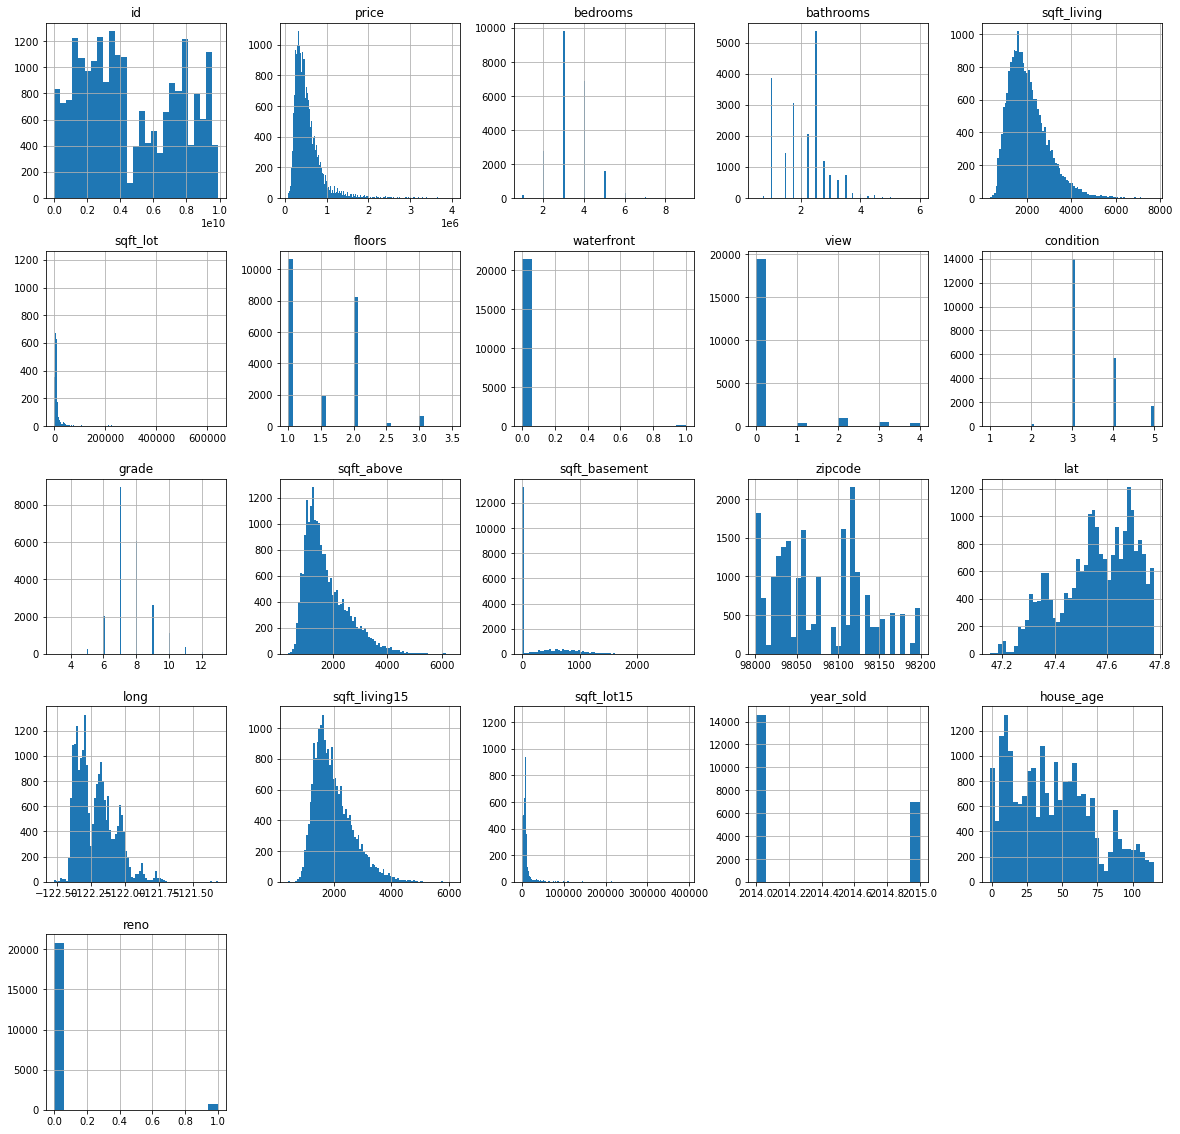

In [48]:
df.hist(figsize=(20,20), bins='auto')

LOOK BETTER!!

# Visualization

Text(0.5, 1.0, 'Pearson Correlation Matrix')

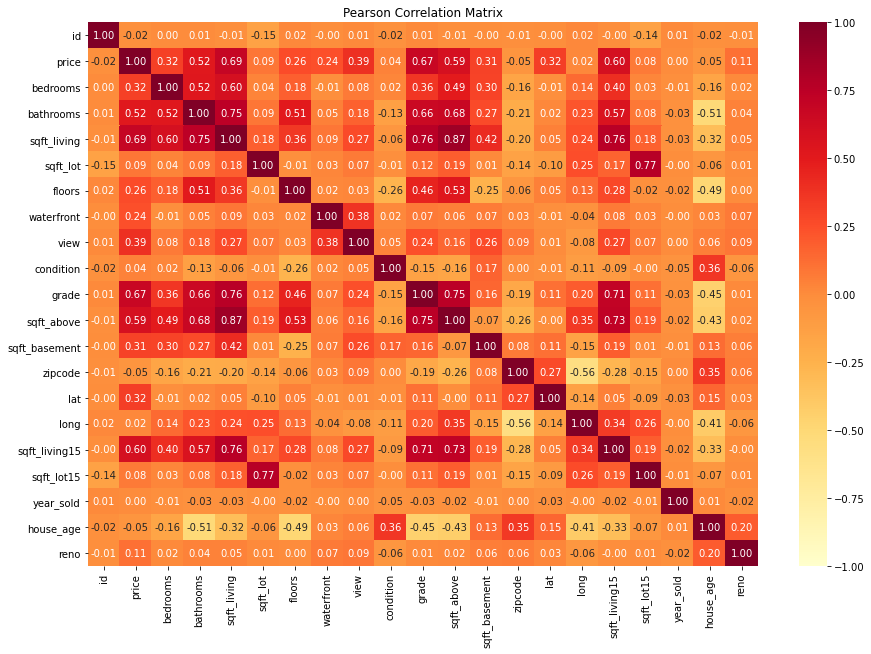

In [49]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap='YlOrRd', annot=True, center=0, fmt=".2f", vmin=-1, vmax=1)

ax.set_title("Pearson Correlation Matrix")

In [50]:
# Show what is most related to price

important_vars = df.corr()['price'].sort_values(ascending=False)[0:12].index

df_predictors = df[important_vars]

df_predictors

,price,sqft_living,grade,sqft_living15,sqft_above,bathrooms,view,lat,bedrooms,sqft_basement,floors,waterfront
0,221900,1180,7,1340,1180,1.00,0.0,47.5112,3,0,1.0,0.0
1,538000,2570,7,1690,2170,2.25,0.0,47.7210,3,400,2.0,0.0
2,180000,770,6,2720,770,1.00,0.0,47.7379,2,0,1.0,0.0
3,604000,1960,7,1360,1050,3.00,0.0,47.5208,4,910,1.0,0.0
4,510000,1680,8,1800,1680,2.00,0.0,47.6168,3,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,1530,8,1530,1530,2.50,0.0,47.6993,3,0,3.0,0.0
21593,400000,2310,8,1830,2310,2.50,0.0,47.5107,4,0,2.0,0.0
21594,402101,1020,7,1020,1020,0.75,0.0,47.5944,2,0,2.0,0.0
21595,400000,1600,8,1410,1600,2.50,0.0,47.5345,3,0,2.0,0.0


In [51]:
# Finding issues with collinearity
# Pairing all the coefficients and getting absolute value of correlation
df_multicorr = df_predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multicorr['pairs'] = list(zip(df_multicorr.level_0, df_multicorr.level_1))

# Making dataframe more readable
df_multicorr.set_index(['pairs'], inplace=True)
df_multicorr.drop(columns=['level_0', 'level_1'], inplace=True)
df_multicorr.columns = ['Correlation']
df_multicorr.drop_duplicates(inplace=True)

df_multicorr

,Correlation
pairs,
"(price, price)",1.000000
"(sqft_living, sqft_above)",0.872166
"(sqft_living, grade)",0.761362
"(sqft_living, sqft_living15)",0.761029
"(grade, sqft_above)",0.753253
...,...
"(waterfront, lat)",0.014203
"(bedrooms, lat)",0.012744
"(waterfront, bedrooms)",0.008084


In [52]:
df_multicorr[(df_multicorr.Correlation >= .75) & (df_multicorr.Correlation < 1)]

,Correlation
pairs,
"(sqft_living, sqft_above)",0.872166
"(sqft_living, grade)",0.761362
"(sqft_living, sqft_living15)",0.761029
"(grade, sqft_above)",0.753253


In [53]:
df_predictors.drop('sqft_above', axis=1, inplace=True)
df_predictors.drop('sqft_living15', axis=1, inplace=True)

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
outcome = 'price'
predictors = df_predictors.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data = df_predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4611.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:            -2.9385e+05
No. Observations:               21550   AIC:                         5.877e+05
Df Residuals:                   21540   BIC:                         5.878e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.209e+07   4.83e+05    -66.477      0.000    -3.3e+07   -3.11e+07
sqft_living     173.3770      3.305     52.463      0.000     166.899     179.855
grade          8.947e+04   2026.019     44.162      0.000    8.55e+04    9.34e+04
bathrooms     -4622.8599   3093.541     -1.494      0.135   -1.07e+04    1440.710
view           7.027e+04   2081.887     33.754      0.000    6.62e+04    7.44e+04
lat             6.66e+05   1.02e+04     65.424      0.000    6.46e+05    6.86e+05
bedrooms      -2.145e+04   1996.511    -10.742      0.000   -2.54e+04   -1.75e+04
sqft_basement     3.8686      4.159      0.930      0.352      -4.283      12.020
floors        -2.392e+04   3419.296     -6.994      0.000   -3.06e+04   -1.72e+04
waterfront     5.514e+05   1.86e+04     29.705      0.000    5.15e+05    5.88e+05
==============================================================================
Omnibus:                    12459.578   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           227703.833
Skew:                           2.416   Prob(JB):                         0.00
Kurtosis:                      18.174   Cond. No.                     7.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
outcome = 'price'
predictors = df_predictors.drop(['bathrooms', 'sqft_basement'], axis=1, inplace=True)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data = df_predictors).fit()
model.summary()

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AttributeError: 'NoneType' object has no attribute 'columns'